In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import folium


In [ ]:
# Load the dataset
file_path = '/content/earthquake_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum().to_dict()
}

data_preview = data.head()
data_info, data_preview


({'Shape': (782, 19),
  'Columns': ['title',
   'magnitude',
   'date_time',
   'cdi',
   'mmi',
   'alert',
   'tsunami',
   'sig',
   'net',
   'nst',
   'dmin',
   'gap',
   'magType',
   'depth',
   'latitude',
   'longitude',
   'location',
   'continent',
   'country'],
  'Data Types': {'title': dtype('O'),
   'magnitude': dtype('float64'),
   'date_time': dtype('O'),
   'cdi': dtype('int64'),
   'mmi': dtype('int64'),
   'alert': dtype('O'),
   'tsunami': dtype('int64'),
   'sig': dtype('int64'),
   'net': dtype('O'),
   'nst': dtype('int64'),
   'dmin': dtype('float64'),
   'gap': dtype('float64'),
   'magType': dtype('O'),
   'depth': dtype('float64'),
   'latitude': dtype('float64'),
   'longitude': dtype('float64'),
   'location': dtype('O'),
   'continent': dtype('O'),
   'country': dtype('O')},
  'Missing Values': {'title': 0,
   'magnitude': 0,
   'date_time': 0,
   'cdi': 0,
   'mmi': 0,
   'alert': 367,
   'tsunami': 0,
   'sig': 0,
   'net': 0,
   'nst': 0,
   'dmin': 

In [ ]:
# Preprocess the data

# Convert 'date_time' to datetime format
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')

# Fill missing values for 'alert' with a placeholder ('unknown') and 'continent', 'country', 'location' with 'Unknown'
data['alert'].fillna('unknown', inplace=True)
data['continent'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['location'].fillna('Unknown', inplace=True)

# Check for invalid datetime conversions (NaT)
invalid_dates = data['date_time'].isnull().sum()

# Summary after preprocessing
preprocessed_summary = {
    "Missing Values After Preprocessing": data.isnull().sum().to_dict(),
    "Invalid Date Entries": invalid_dates
}

preprocessed_summary


<ipython-input-4-c2a6343c0d62>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
<ipython-input-4-c2a6343c0d62>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['alert'].fillna('unknown', inplace=True)
<ipython-input-4-c2a6343c0d62>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assi

{'Missing Values After Preprocessing': {'title': 0,
  'magnitude': 0,
  'date_time': 0,
  'cdi': 0,
  'mmi': 0,
  'alert': 0,
  'tsunami': 0,
  'sig': 0,
  'net': 0,
  'nst': 0,
  'dmin': 0,
  'gap': 0,
  'magType': 0,
  'depth': 0,
  'latitude': 0,
  'longitude': 0,
  'location': 0,
  'continent': 0,
  'country': 0},
 'Invalid Date Entries': 0}

Top 10 High-Seismicity Zones:
        continent                     country  count
38  South America                       Chile     33
8            Asia                       Japan     25
29  North America                      Mexico     24
30  North America    United States of America     21
17           Asia                      Russia     19
41  South America                        Peru     15
15           Asia  People's Republic of China     15
40  South America                     Ecuador     10
3            Asia                 Afghanistan     10
7            Asia                        Iran      9


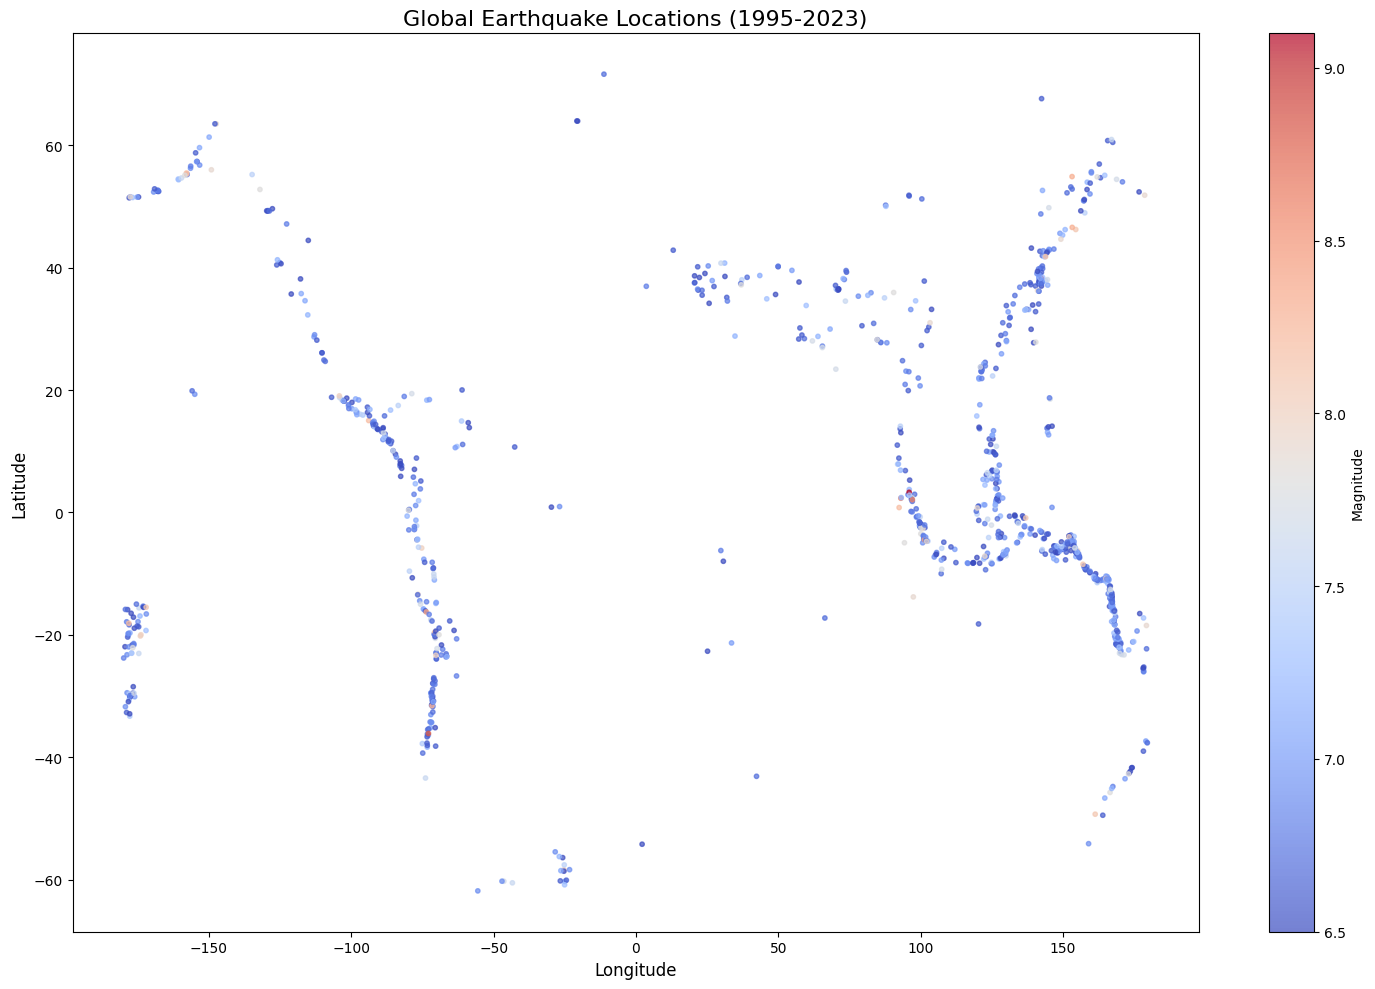

In [ ]:
# Load preprocessed dataset
data = pd.read_csv('/content/earthquake_1995-2023.csv')

# Group by continent and country to analyze earthquake frequency
high_seismicity = data.groupby(['continent', 'country']).size().reset_index(name='count')
high_seismicity = high_seismicity.sort_values(by='count', ascending=False)

# Display the top 10 regions with the most earthquakes
print("Top 10 High-Seismicity Zones:")
print(high_seismicity.head(10))

# Visualize earthquake locations
plt.figure(figsize=(15, 10))
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['magnitude'], cmap='coolwarm', s=10, alpha=0.7)
plt.colorbar(scatter, label='Magnitude')
plt.title('Global Earthquake Locations (1995-2023)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()


Correlation Matrix:
           magnitude     depth   tsunami
magnitude   1.000000  0.017083 -0.001213
depth       0.017083  1.000000  0.070705
tsunami    -0.001213  0.070705  1.000000


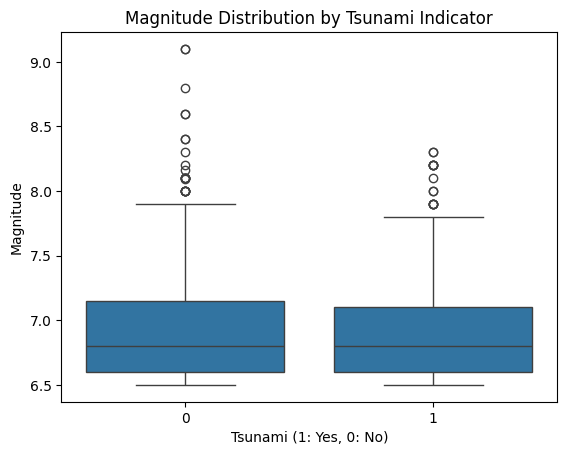

In [ ]:
# Correlation between tsunami and seismic parameters
tsunami_correlation = data[['magnitude', 'depth', 'tsunami']].corr()
print("Correlation Matrix:")
print(tsunami_correlation)

# Visualize tsunami vs. magnitude
sns.boxplot(x='tsunami', y='magnitude', data=data)
plt.title('Magnitude Distribution by Tsunami Indicator')
plt.xlabel('Tsunami (1: Yes, 0: No)')
plt.ylabel('Magnitude')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Feature selection and encoding
features = data[['magnitude', 'depth']]
target = data['cdi']  # Predicting CDI
features = features.fillna(0)
target = target.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually

print(f"Model RMSE: {rmse}")

Model RMSE: 3.3826527397841715


Alert Level Distribution:
alert
green     353
yellow     59
orange     24
red        13
Name: count, dtype: int64


<ipython-input-13-fd1d5c50b779>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alert', y='magnitude', data=data, palette='Set2')


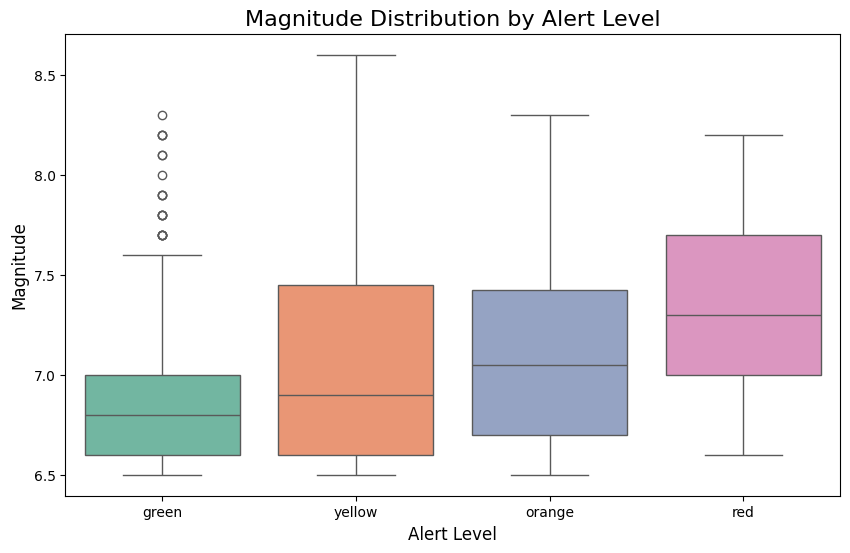

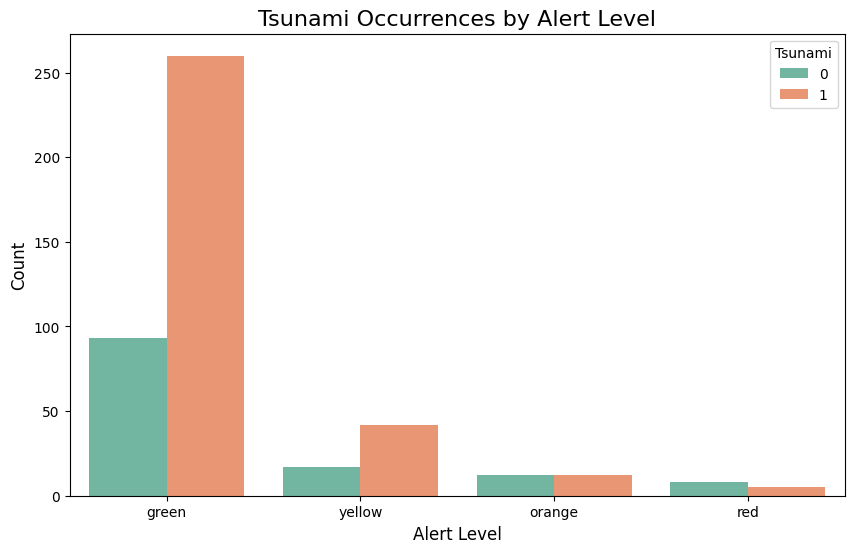

In [ ]:
# Analyze alert levels
alert_distribution = data['alert'].value_counts()
print("Alert Level Distribution:")
print(alert_distribution)

# Visualize alert levels with magnitude and tsunami
plt.figure(figsize=(10, 6))
sns.boxplot(x='alert', y='magnitude', data=data, palette='Set2')
plt.title('Magnitude Distribution by Alert Level', fontsize=16)
plt.xlabel('Alert Level', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='alert', hue='tsunami', data=data, palette='Set2')
plt.title('Tsunami Occurrences by Alert Level', fontsize=16)
plt.xlabel('Alert Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Tsunami', loc='upper right')
plt.show()


In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']))

# Initialize a folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add a heatmap
heat_data = [[row['latitude'], row['longitude'], row['magnitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)


m.save("earthquake_heatmap.html")
print("Heatmap saved as earthquake_heatmap.html")


Heatmap saved as earthquake_heatmap.html


<ipython-input-15-367665b48c77>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'])


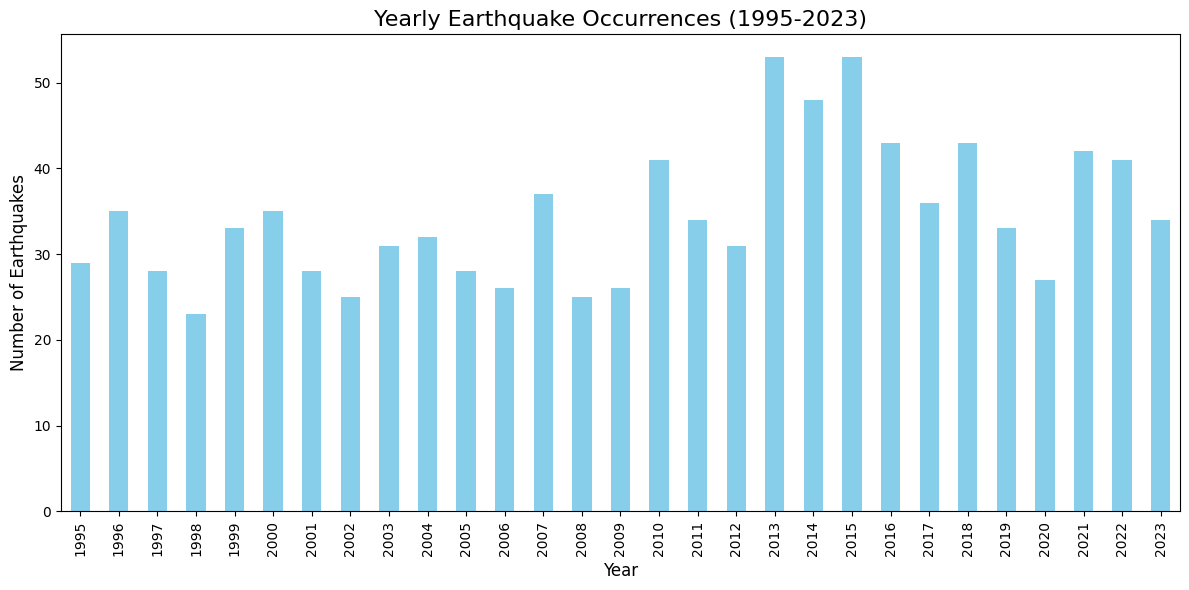

In [ ]:
# Convert date column to datetime if not already done
data['date_time'] = pd.to_datetime(data['date_time'])

# Extract year and group by year
data['year'] = data['date_time'].dt.year
yearly_trend = data.groupby('year').size()

# Plot yearly trend
plt.figure(figsize=(12, 6))
yearly_trend.plot(kind='bar', color='skyblue')
plt.title('Yearly Earthquake Occurrences (1995-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.tight_layout()
plt.show()